# Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as sns

# Dataset

In [2]:
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
type(X_train) # Tensors of MNIST Digit Data.

numpy.ndarray

In [5]:
X_train.shape # Training Tensors.

(60000, 28, 28)

In [6]:
y_train.shape # Labels for tensors

(60000,)

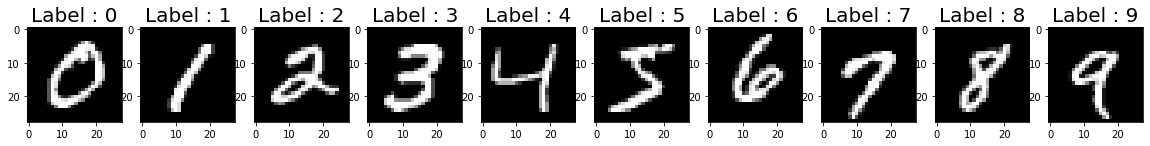

In [7]:
num = 10
fig, axes = plt.subplots(1,num,figsize = (20,20))

for i in range(num):
    sample = X_train[y_train==i][0]
    axes[i].imshow(sample,cmap = 'gray')
    axes[i].set_title("Label : {}".format(i),fontsize = 20)

In [8]:
y_train = keras.utils.to_categorical(y_train,num)
y_test = keras.utils.to_categorical(y_test,num) # Vector Encoding Labels.

In [9]:
for i in range(5):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
# Normalizing Data
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
# Reshape 
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)

(60000, 784)


# Building Model : Normal DNN

In [12]:
model = Sequential()

model.add(Dense(units = 128,input_shape=(784,),activation = 'relu'))
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10,activation = 'softmax'))

model.compile(loss = "categorical_crossentropy",optimizer = 'adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [14]:
batch_size = 512
epochs = 10
model.fit(X_train,y_train,batch_size,epochs)

Epoch 1/10
118/118 [==============================] - 3s 9ms/step - loss: 0.5889 - accuracy: 0.8307
Epoch 2/10
118/118 [==============================] - 1s 9ms/step - loss: 0.2258 - accuracy: 0.9351
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1661 - accuracy: 0.9513
Epoch 4/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1327 - accuracy: 0.9596
Epoch 5/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1099 - accuracy: 0.9678
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0940 - accuracy: 0.9722
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0798 - accuracy: 0.9754
Epoch 8/10
118/118 [==============================] - 1s 12ms/step - loss: 0.0709 - accuracy: 0.9792
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0609 - accuracy: 0.9819
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0541 - accuracy: 

## Testing

In [15]:
preds = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [16]:
preds

array([[8.4925802e-07, 2.8095280e-07, 3.4811030e-05, ..., 9.9954236e-01,
        2.0700084e-07, 7.4912709e-06],
       [5.4399408e-07, 9.7500783e-04, 9.9886036e-01, ..., 3.0451693e-07,
        8.8869238e-06, 1.6453027e-09],
       [1.0398149e-06, 9.9835771e-01, 3.1821130e-04, ..., 8.9736714e-04,
        1.4824445e-04, 1.2613859e-05],
       ...,
       [8.6187092e-11, 8.2482576e-10, 5.1328919e-10, ..., 1.2770007e-06,
        9.2032861e-09, 3.7421337e-06],
       [8.7257447e-08, 4.4960338e-08, 2.1994733e-09, ..., 1.8430431e-09,
        2.2235970e-05, 9.8528252e-09],
       [3.6591732e-08, 1.0203470e-09, 1.3837701e-08, ..., 9.4145937e-13,
        1.0806081e-08, 9.0966601e-10]], dtype=float32)

In [17]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0747 - accuracy: 0.9768


In [18]:
test_acc

0.9768000245094299

In [19]:
test_loss

0.07469567656517029

In [20]:
pred_classes = np.argmax(preds,axis=1)
pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

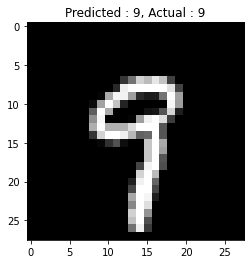

In [21]:
randidx = np.random.choice(len(X_test))
X_sample = X_test[randidx]
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[randidx]
y_sample_pred_class = pred_classes[randidx]

plt.title("Predicted : {}, Actual : {}".format(y_sample_pred_class,y_sample_true))
plt.imshow(X_sample.reshape(28,28),cmap = 'gray')

## Confusion Matrix

[[ 969    1    0    0    1    3    2    1    3    0]
 [   0 1121    3    1    0    1    4    1    4    0]
 [   5    0 1006    9    1    0    1    5    4    1]
 [   0    0    3  997    0    4    0    1    5    0]
 [   1    0    2    0  951    1    6    2    2   17]
 [   2    0    0    8    1  873    2    0    4    2]
 [   4    3    1    0    2    8  938    0    2    0]
 [   1    5    8    3    0    0    0 1001    1    9]
 [   3    1    3   13    4    9    3    3  931    4]
 [   3    3    0    9    5    3    1    4    0  981]]


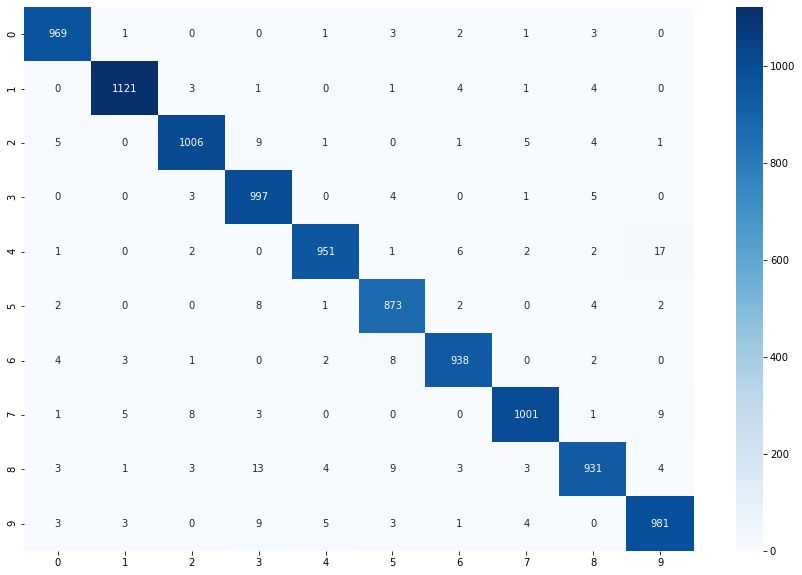

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, pred_classes)
fig,axes = plt.subplots(figsize = (15,10))
axes = sns.heatmap(cm,annot = True,fmt='d',ax = axes, cmap = "Blues")
print(cm)